In [64]:
import pandas as pd
import numpy as np
import plotly as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer
import seaborn as sns                       
import matplotlib.pyplot as plt             
%matplotlib inline     
sns.set(color_codes=True)

In [38]:
df = pd.read_csv('../data/social_media_vs_productivity.csv')

In [39]:
df.shape

(30000, 19)

In [40]:
df.columns.tolist()

['age',
 'gender',
 'job_type',
 'daily_social_media_time',
 'social_platform_preference',
 'number_of_notifications',
 'work_hours_per_day',
 'perceived_productivity_score',
 'actual_productivity_score',
 'stress_level',
 'sleep_hours',
 'screen_time_before_sleep',
 'breaks_during_work',
 'uses_focus_apps',
 'has_digital_wellbeing_enabled',
 'coffee_consumption_per_day',
 'days_feeling_burnout_per_month',
 'weekly_offline_hours',
 'job_satisfaction_score']

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             30000 non-null  int64  
 1   gender                          30000 non-null  object 
 2   job_type                        30000 non-null  object 
 3   daily_social_media_time         27235 non-null  float64
 4   social_platform_preference      30000 non-null  object 
 5   number_of_notifications         30000 non-null  int64  
 6   work_hours_per_day              30000 non-null  float64
 7   perceived_productivity_score    28386 non-null  float64
 8   actual_productivity_score       27635 non-null  float64
 9   stress_level                    28096 non-null  float64
 10  sleep_hours                     27402 non-null  float64
 11  screen_time_before_sleep        27789 non-null  float64
 12  breaks_during_work              

In [42]:
df.nunique()

age                                  48
gender                                3
job_type                              6
daily_social_media_time           25375
social_platform_preference            5
number_of_notifications              61
work_hours_per_day                29821
perceived_productivity_score      28386
actual_productivity_score         27635
stress_level                         10
sleep_hours                       26926
screen_time_before_sleep          25567
breaks_during_work                   11
uses_focus_apps                       2
has_digital_wellbeing_enabled         2
coffee_consumption_per_day           11
days_feeling_burnout_per_month       32
weekly_offline_hours              26737
job_satisfaction_score            27079
dtype: int64

In [43]:
df.isnull().sum()

age                                  0
gender                               0
job_type                             0
daily_social_media_time           2765
social_platform_preference           0
number_of_notifications              0
work_hours_per_day                   0
perceived_productivity_score      1614
actual_productivity_score         2365
stress_level                      1904
sleep_hours                       2598
screen_time_before_sleep          2211
breaks_during_work                   0
uses_focus_apps                      0
has_digital_wellbeing_enabled        0
coffee_consumption_per_day           0
days_feeling_burnout_per_month       0
weekly_offline_hours                 0
job_satisfaction_score            2730
dtype: int64

In [44]:
# процент пропущенных данных по столбцам
(df.isnull().sum()/(len(df)))*100

age                               0.000000
gender                            0.000000
job_type                          0.000000
daily_social_media_time           9.216667
social_platform_preference        0.000000
number_of_notifications           0.000000
work_hours_per_day                0.000000
perceived_productivity_score      5.380000
actual_productivity_score         7.883333
stress_level                      6.346667
sleep_hours                       8.660000
screen_time_before_sleep          7.370000
breaks_during_work                0.000000
uses_focus_apps                   0.000000
has_digital_wellbeing_enabled     0.000000
coffee_consumption_per_day        0.000000
days_feeling_burnout_per_month    0.000000
weekly_offline_hours              0.000000
job_satisfaction_score            9.100000
dtype: float64

In [45]:
# проверка на наличие ненужных символов
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

age : [56 46 32 60 25 38 36 40 28 41 53 57 20 39 19 61 47 55 50 29 42 44 59 45
 33 64 54 24 26 35 21 31 43 37 52 34 23 51 27 48 65 62 58 18 22 30 49 63]
gender : ['Male' 'Female' 'Other']
job_type : ['Unemployed' 'Health' 'Finance' 'IT' 'Education' 'Student']
daily_social_media_time : [ 4.18093978  3.24960295         nan ...  4.43778435 17.72498127
  3.79663389]
social_platform_preference : ['Facebook' 'Twitter' 'Telegram' 'TikTok' 'Instagram']
number_of_notifications : [61 59 57 66 50 60 49 64 77 65 67 52 47 62 63 58 73 56 55 74 46 51 48 45
 72 69 53 76 70 71 54 42 37 68 79 75 36 39 83 40 44 86 43 89 80 84 81 41
 82 78 31 87 90 85 38 34 35 32 30 33 88]
work_hours_per_day : [ 6.75355841  9.16929612  7.91095203 ... 10.91503554  6.93740956
  8.06988298]
perceived_productivity_score : [8.04046395 5.06336816 3.86176246 ... 8.61100467 7.76707611 6.31122723]
actual_productivity_score : [7.29155527 5.165093   3.47405317 ... 8.65891154 6.89558333 5.40272551]
stress_level : [ 4.  7.  6.  5.  3.

#### Визуализируем пропуски данных

<Axes: >

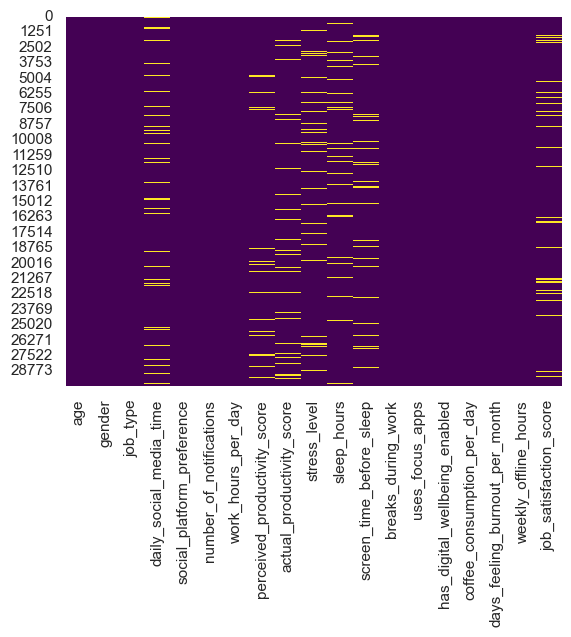

In [46]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

#### По графику и таблицам ясно, что пропущенных данные нужно импьютировать. Заполняем пропуски в столбцах `daily_social_media_time`, `perceived_productivity_score`, `actual_productivity_score`, `stress_level`, `sleep_hours`, `screen_time_before_sleep`, `job_satisfaction_score`

In [47]:
# разделим колонки на категориальные и нумерические
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
categorical_cols = df.select_dtypes(include=["object", "bool"]).columns

In [48]:
imputer_mean = SimpleImputer(strategy='mean')
df[numeric_cols] = imputer_mean.fit_transform(df[numeric_cols])

In [49]:
imputer_mode = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_mode.fit_transform(df[categorical_cols])

In [50]:
# данные после импьютации
df.isnull().sum()

age                               0
gender                            0
job_type                          0
daily_social_media_time           0
social_platform_preference        0
number_of_notifications           0
work_hours_per_day                0
perceived_productivity_score      0
actual_productivity_score         0
stress_level                      0
sleep_hours                       0
screen_time_before_sleep          0
breaks_during_work                0
uses_focus_apps                   0
has_digital_wellbeing_enabled     0
coffee_consumption_per_day        0
days_feeling_burnout_per_month    0
weekly_offline_hours              0
job_satisfaction_score            0
dtype: int64

In [51]:
df.describe()

age  daily_social_media_time  number_of_notifications  \
count  30000.000000             30000.000000             30000.000000   
mean      41.486867                 3.113418                59.958767   
std       13.835221                 1.976884                 7.723772   
min       18.000000                 0.000000                30.000000   
25%       30.000000                 1.797748                55.000000   
50%       41.000000                 3.113418                60.000000   
75%       53.000000                 4.219533                65.000000   
max       65.000000                17.973256                90.000000   

       work_hours_per_day  perceived_productivity_score  \
count        30000.000000                  30000.000000   
mean             6.990792                      5.510488   
std              1.997736                      1.968285   
min              0.000000                      2.000252   
25%              5.643771                      3.858604   
50%              6.990641                      5.510488   
75%              8.354725                      7.168062   
max             12.000000                      8.999376   

       actual_productivity_score  stress_level   sleep_hours  \
count               30000.000000  30000.000000  30000.000000   
mean                    4.951805      5.514059      6.500247   
std                     1.807615      2.773891      1.399175   
min                     0.296812      1.000000      3.000000   
25%                     3.509336      3.000000      5.598942   
50%                     4.951805      5.514059      6.500247   
75%                     6.396285      8.000000      7.398974   
max                     9.846258     10.000000     10.000000   

       screen_time_before_sleep  breaks_during_work  \
count              30000.000000        30000.000000   
mean                   1.025568            4.992200   
std                    0.628817            3.173737   
min                    0.000000            0.000000   
25%                    0.569569            2.000000   
50%                    1.025568            5.000000   
75%                    1.435798            8.000000   
max                    3.000000           10.000000   

       coffee_consumption_per_day  days_feeling_burnout_per_month  \
count                30000.000000                    30000.000000   
mean                     1.999300                       15.557067   
std                      1.410047                        9.252956   
min                      0.000000                        0.000000   
25%                      1.000000                        8.000000   
50%                      2.000000                       16.000000   
75%                      3.000000                       24.000000   
max                     10.000000                       31.000000   

       weekly_offline_hours  job_satisfaction_score  
count          30000.000000            30000.000000  
mean              10.360655                4.964901  
std                7.280415                2.022374  
min                0.000000                0.000000  
25%                4.541872                3.528486  
50%               10.013677                4.964901  
75%               15.300809                6.407090  
max               40.964769               10.000000

In [52]:
columns = df.describe().columns.to_list()
rows = 4
cols = 4
# Создаём сабплоты
fig = make_subplots(rows=rows, cols=cols, vertical_spacing=0.03, subplot_titles=columns)

# Добавляем боксплоты в сабплоты
for i, col in enumerate(columns):
    row = i // cols + 1
    col_num = i % cols + 1
    fig.add_trace(go.Box(y=df[col], name=col, boxpoints='outliers'), row=row, col=col_num)

# Обновляем макет
fig.update_layout(
    height=500 * rows,  # подстрой под нужную высоту
    width=1200,
    title_text="Boxplots по числовым колонкам",
    showlegend=False
)

fig.show()

In [53]:
df.describe(include='object')

gender   job_type social_platform_preference uses_focus_apps  \
count   30000      30000                      30000           30000   
unique      3          6                          5               2   
top      Male  Education                     TikTok           False   
freq    14452       5055                       6096           20979   

       has_digital_wellbeing_enabled  
count                          30000  
unique                             2  
top                            False  
freq                           22602

In [63]:
columns = df.describe(include='object').columns.to_list()
rows = 2
cols = 3
# Создаём сабплоты
fig = make_subplots(rows=rows, cols=cols, vertical_spacing=0.1, subplot_titles=columns)

# Добавляем боксплоты в сабплоты
for i, col in enumerate(columns):
    row = i // cols + 1
    col_num = i % cols + 1
    fig.add_trace(go.Histogram(x=df[col], name=col), row=row, col=col_num)

# Обновляем макет
fig.update_layout(
    height=500 * rows,  # подстрой под нужную высоту
    width=800,
    title_text="Barplots по числовым колонкам",
    showlegend=False
)

fig.show()

#### Распределение числовых переменных

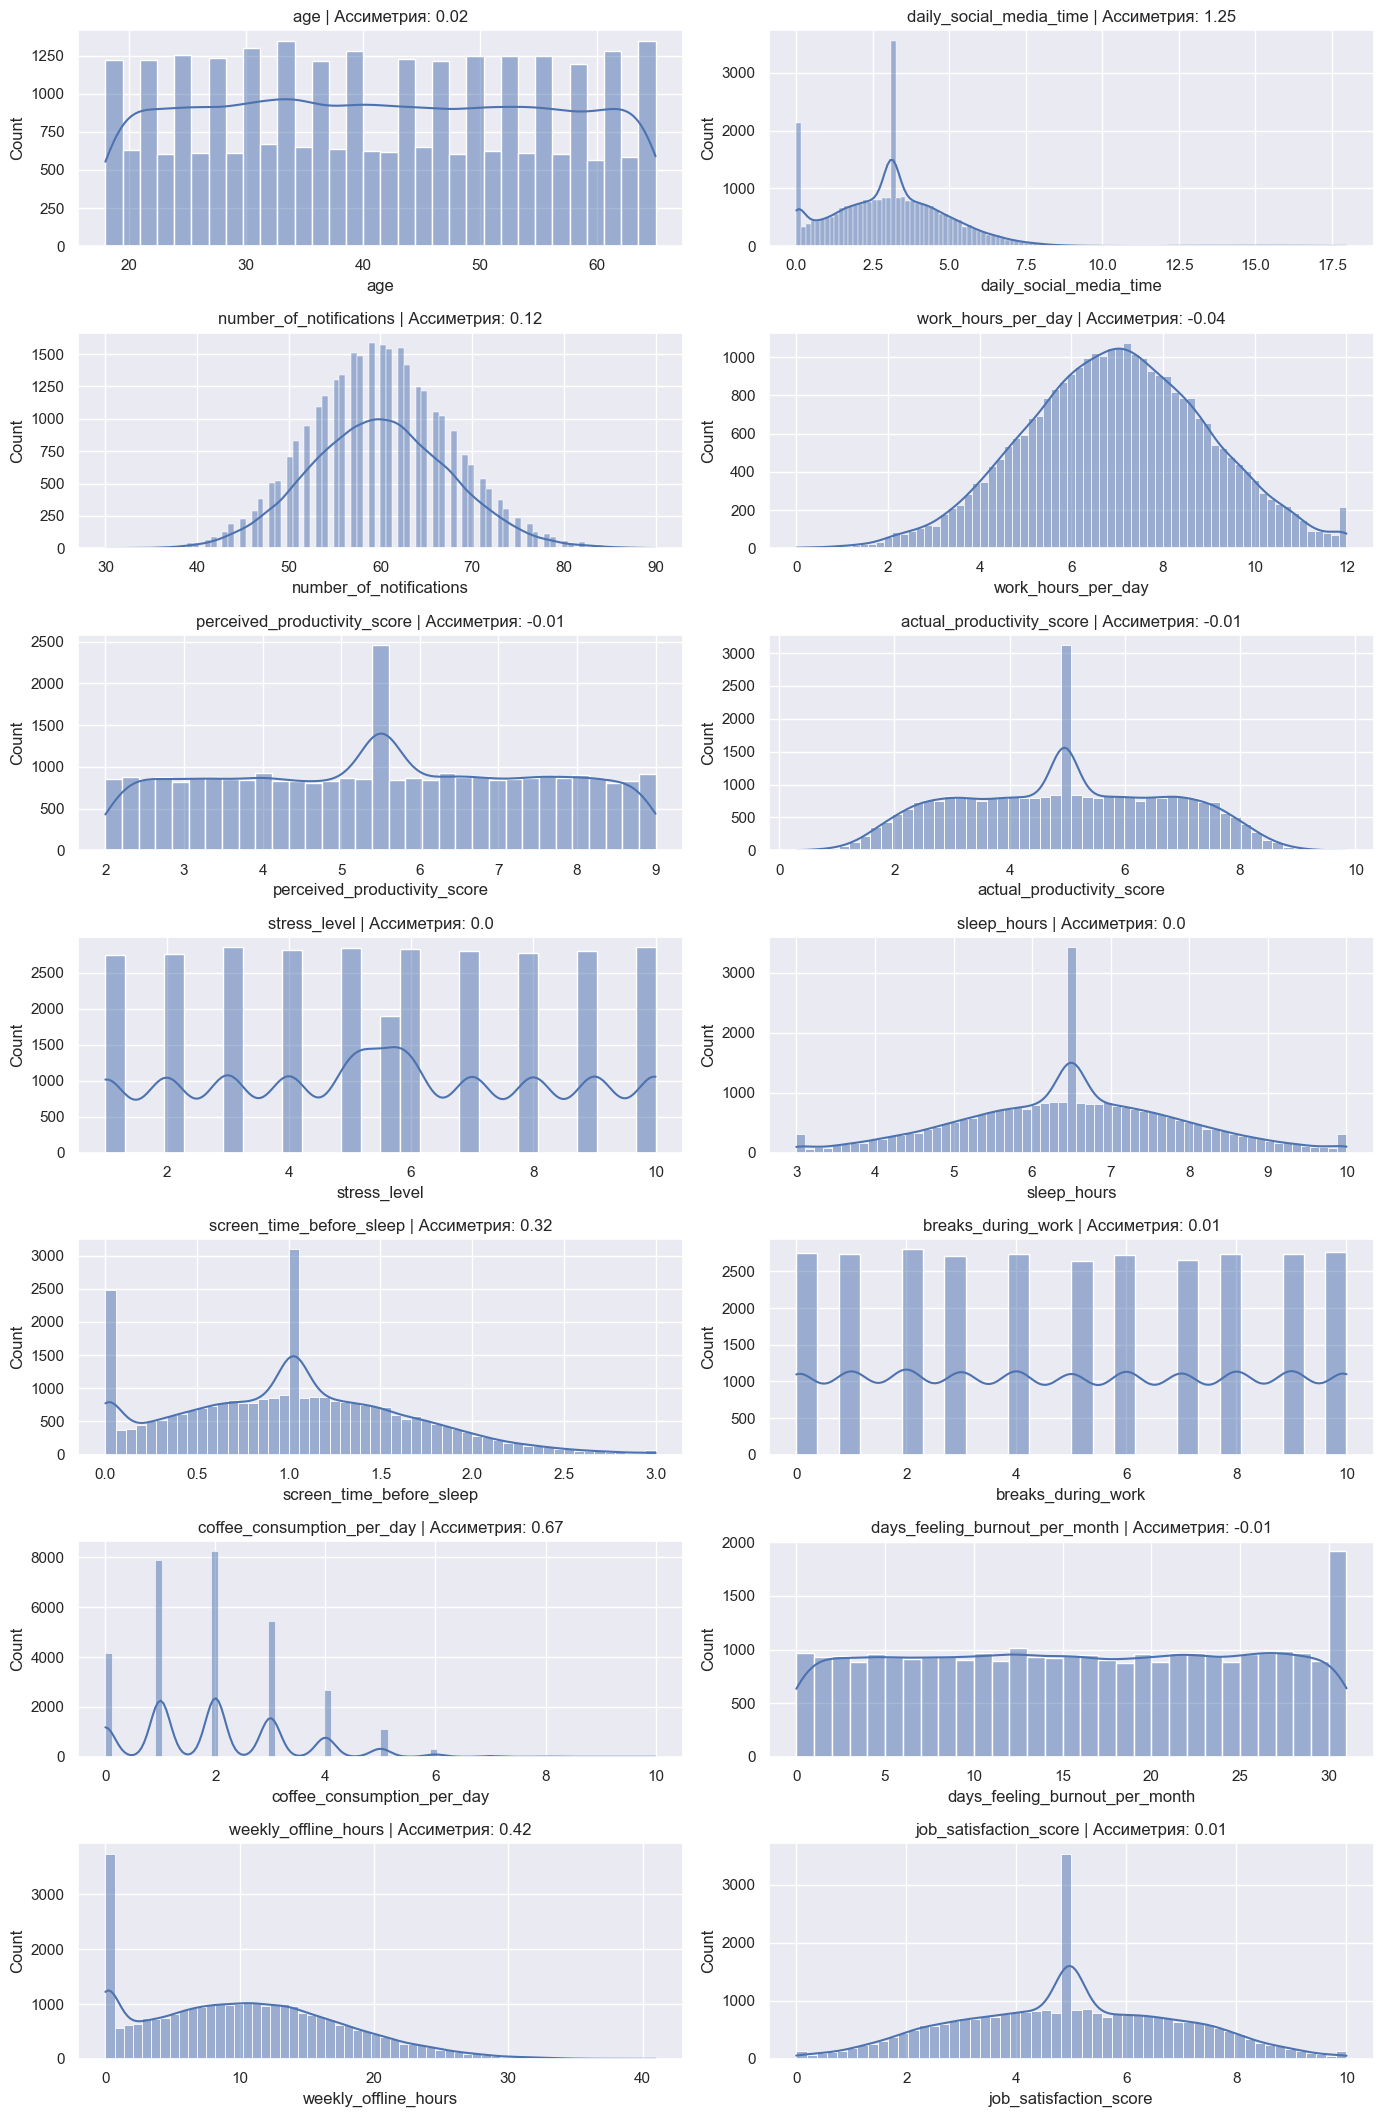

In [89]:
sns.set_style("darkgrid")

plt.figure(figsize=(14, len(numeric_cols) * 3))
for idx, feature in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Ассиметрия: {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

#### Можно заметить, что многие переменные распределены нормально, по данным столбцов `daily_social_media_time `, `weekly_offline_hours `, `screen_time_before_sleep ` можно сразу увидеть наличие цифровых зависимостей в наблюдаемых данных

In [100]:
# проверим корреляцию между числовыми данными 
fig = px.imshow(matrix.corr(), text_auto=True, 
    title='Корреляционная матрица',
    aspect='auto'
)

fig.update_layout(
    xaxis_title="Признаки",
    yaxis_title="Признаки",
    width=900,
    height=800
)
fig.show()

#### Можно заметить, что корреляция в основном у нас проявляется между данными в столбцах `perceived_productivity_score`, `	actual_productivity_score` и `job_satisfaction_score`